This is a document for keeping track of changes made to outwasher_reogranized after the meeting with Brad on 09/22/22. Suggestions were to:
1. make discharge dynamic with bay level 
2. change/increase the substep
3. play with Ki 
4. Change C to different regions: uphill should be related to depth as opposed to slope
5. Add back in vegetation effects (go back to "normal" domain?)

<div class="alert alert-block alert-info">
<b>Note:</b> Barrier3D has significantly larger Rexcess values than Outwasher, so we are likely going to need to increase ours by a factor to see similar results
</div>

# 1. Dynamic Discharge

I tried 2 different dynamic discharges, which can also be merged together. Both start by calculating the overwash at the dune gaps. The first method then takes the total discharge and distributes it evenly among the back barrier as a conservation of discharge (fig 1). The second method takes the avg Rexcess value from the storm across the dunes and uses that to calculate an average discharge using the dune gap equation. Then, this value is multipled by a factor and set to the initial discharge at the first row (fig 2). The third method is to just set an arbitraty initial discharge value which is very similar to method 2, except we do not get varryig discharges based on baylevel (fig 3). The first method only uses the downhill flow routing equation

$$Q_i = {Q_o*S_i^n \over \sum{S_i^n}}$$ 

for discharge starting after the dunes. The other two methods use the uphill and downhill flow routing equations. 

$$Q_i = {Q_o*|S_i|^{-n} \over \sum |S_i|^{-n}}*({1-{|S_i| \over S_{qlim}})}$$

Figure 1:
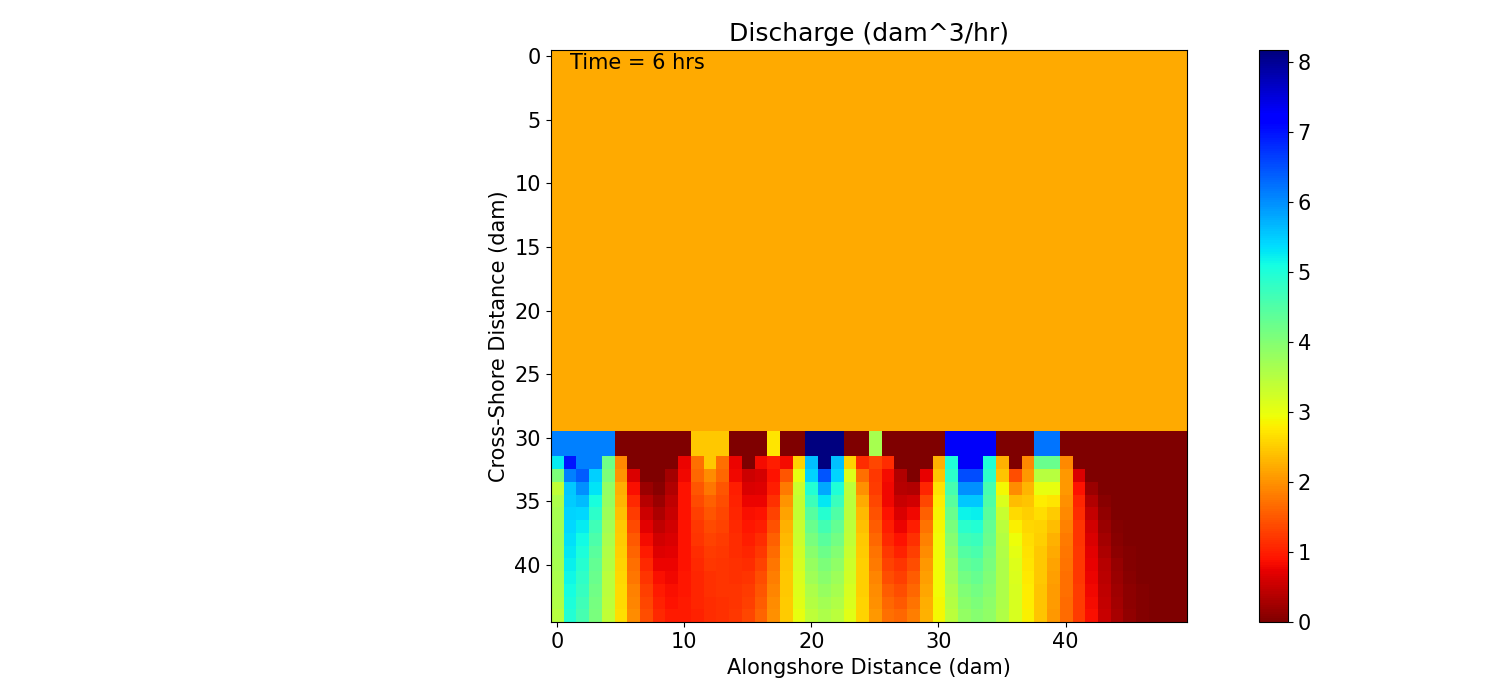

Figure 2:
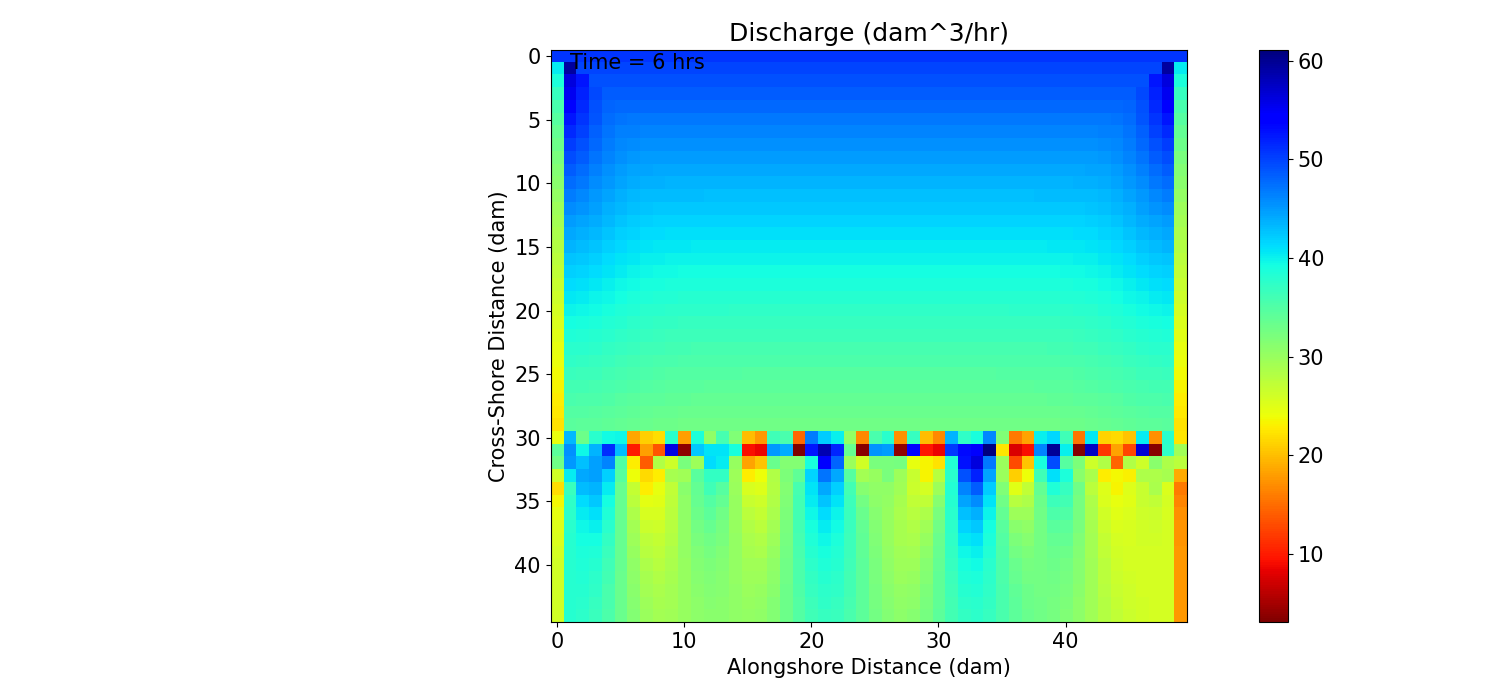

Figure 3:
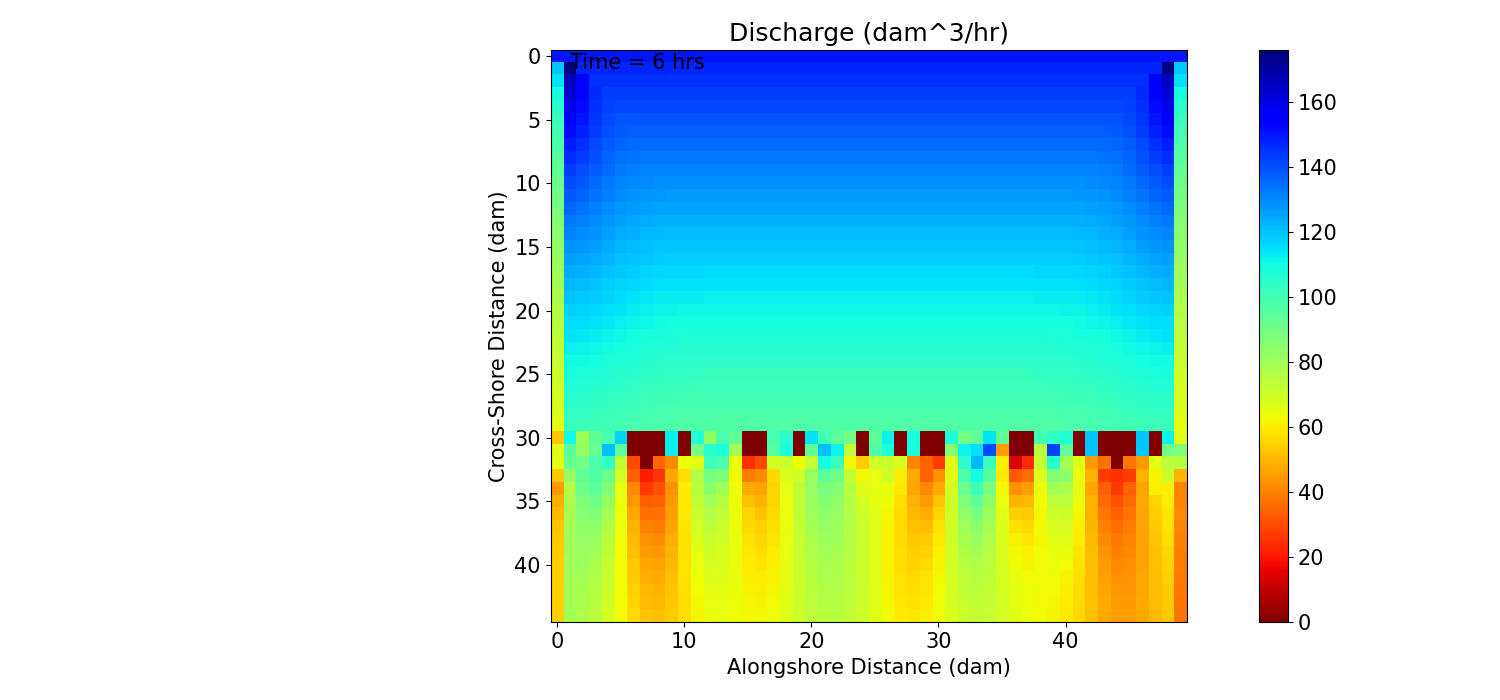


I think that it makes the most intuitive sense to used Method 1 but scaled up by a lot (see fig). We would likely see constant discharges, with varying velocities with depth in the back barrier, while velocities would also increase downhill on the beachface side. The issue is we need to assign a Q1, Q2, and Q3 value to these discharges bc sediment flux requires a Q value. 

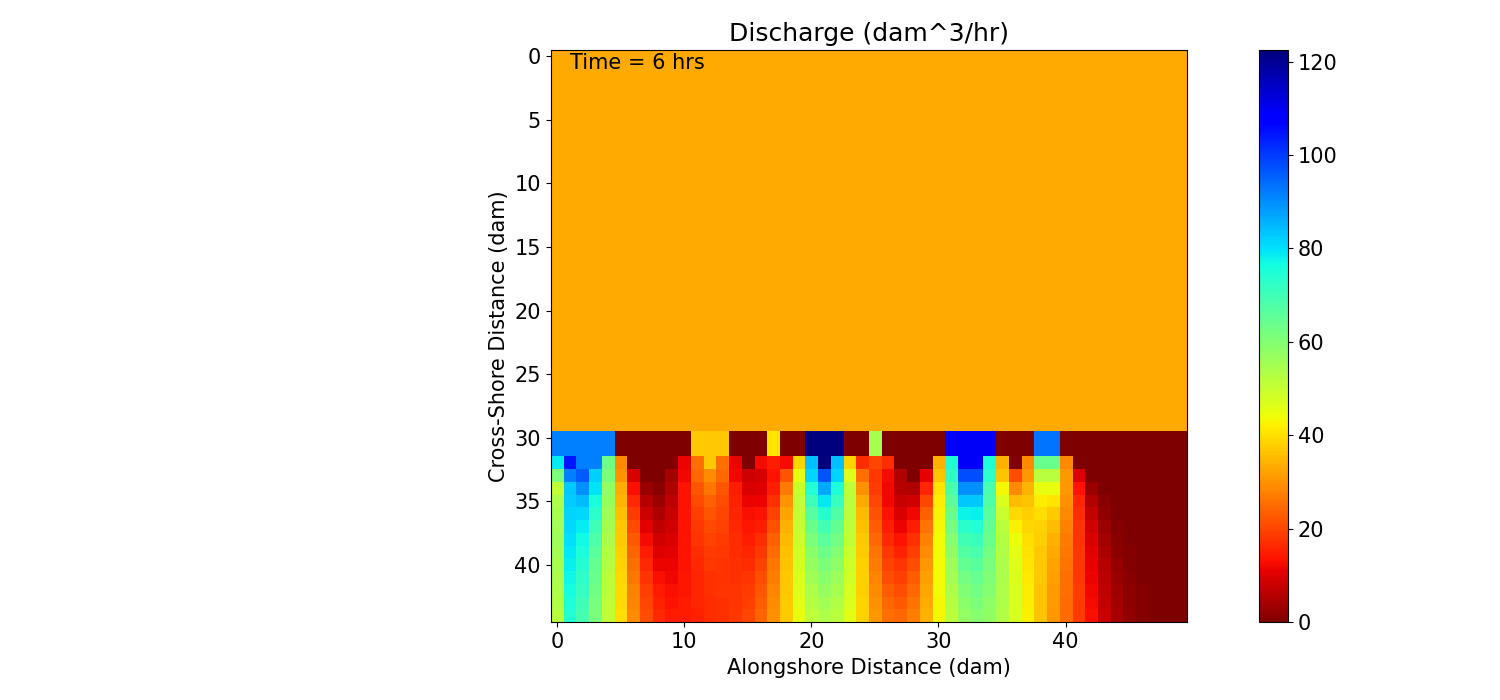


# Sediment Transport

Currently, sediment transport is based on the discharge, slope, and other constants that can be tuned to give physical features we want to see. Here are the current sediment transport equations:

$$Q_{si} = K_i[Q_o(S_i+C)]^m $$

$$C = cx*S_i $$

Ki: constant adjusted so that the elevation changes by at most a few per cent of the mean elevation difference between rows in each time step

C: is of the order of the average slope (used to represent flow momentum)

In B3D, Ki is 7.5E-6, cx is 10, and m is 2 which yields very small sed fluxes:

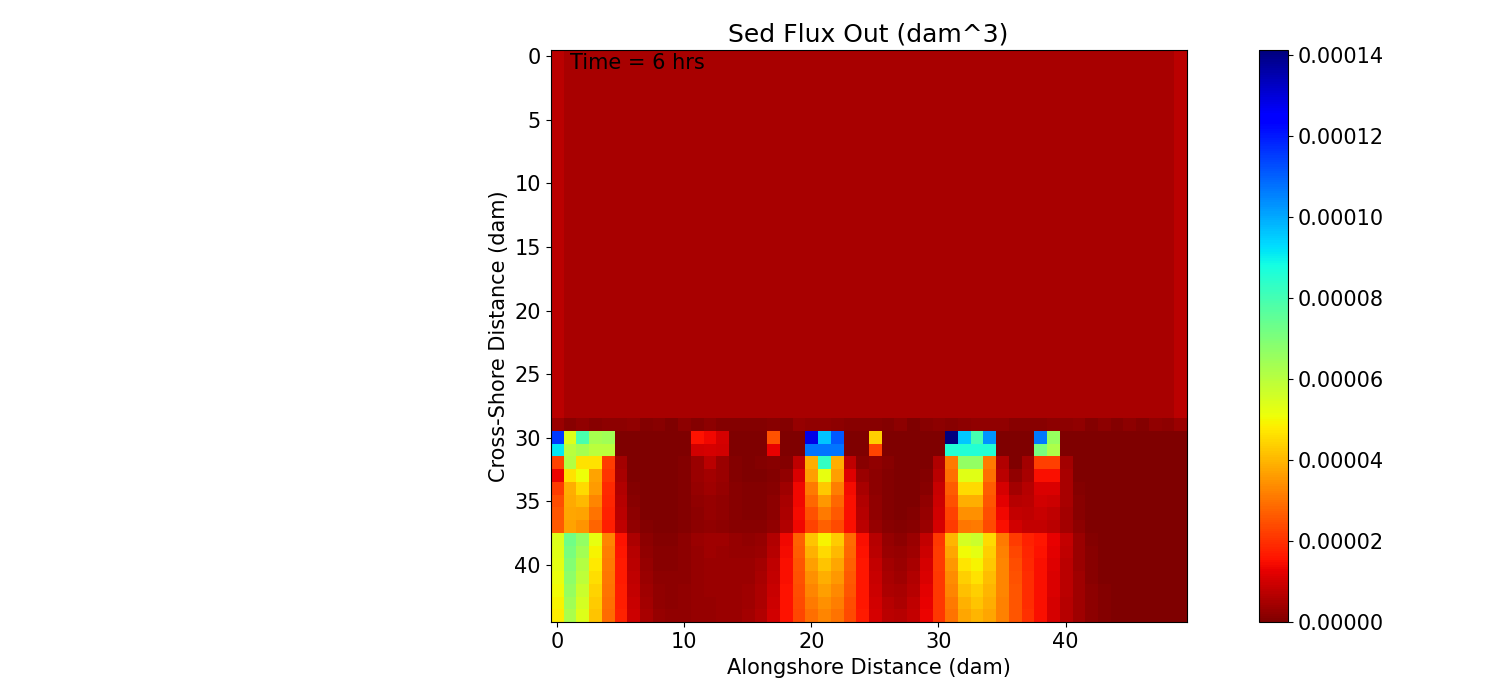

And elevation change:

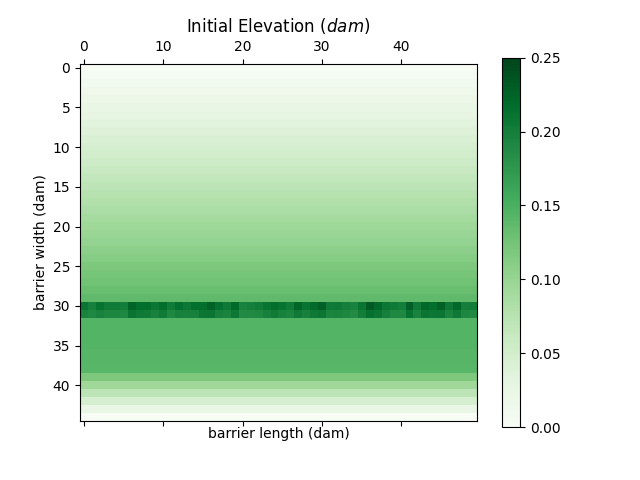
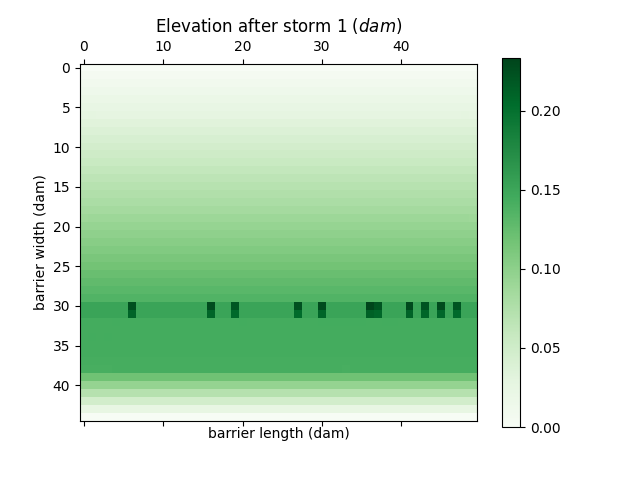

# 3. Ki Changes

If we change Ki, which significantly changes sediment flux we get the same pattern just higher values (KiE-3):

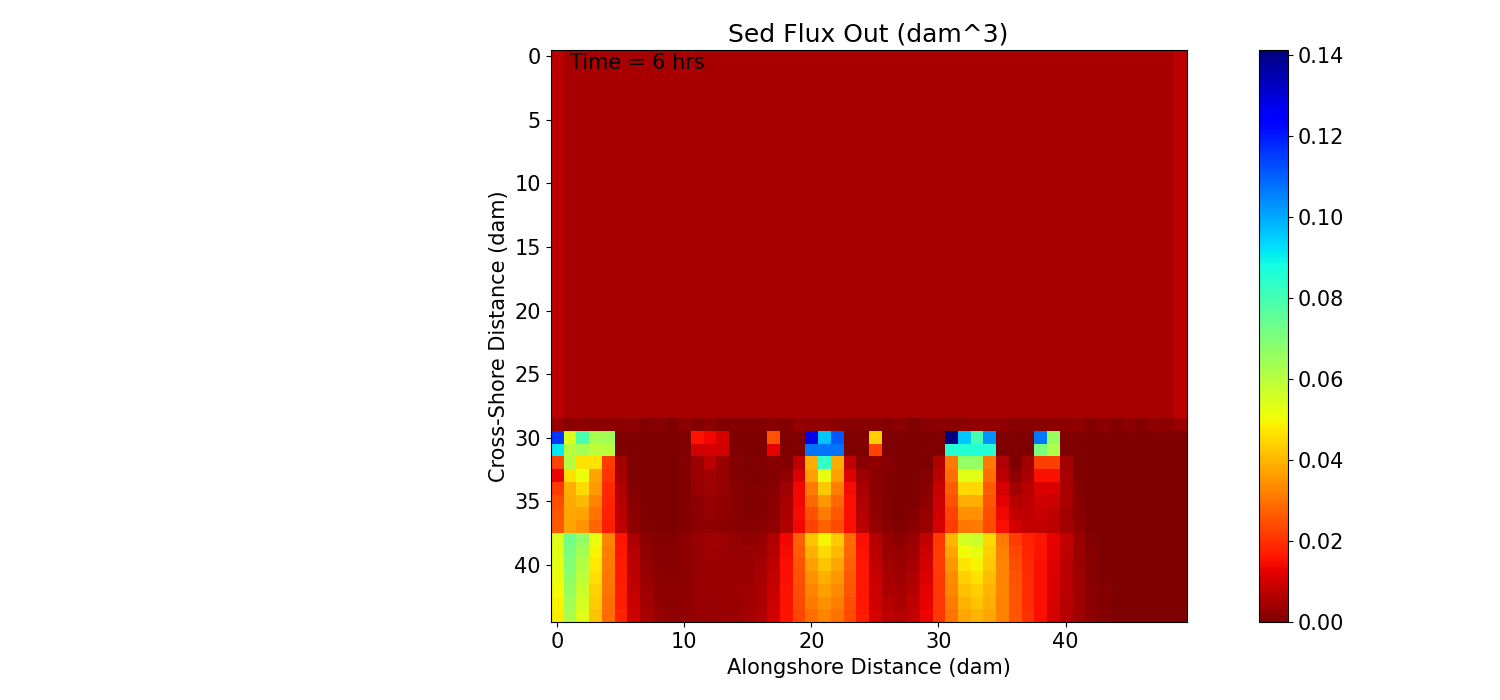

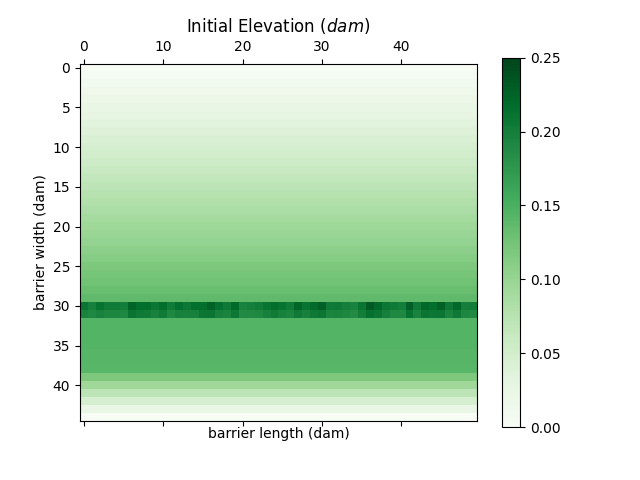
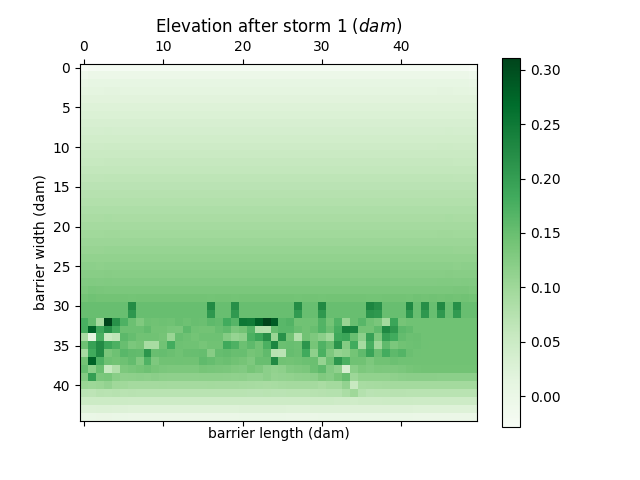


This looks good for the downhill flow, but we want greater changes going uphill. Therefore, we will change the relationship for C based on uphill and downhill segments. 

# 4. Difference Regions for C

For the uphill segments, velocity would be inversely related to depth, so larger depth = smaller sediment movement. We have depths ranging probably from about 0.06 (Rexcess at dunes) to 0.2 dam (at they back of the bay). Additionally, we are going to use the regulr C = Cx * Si for the downhill segment, just now the average slope will be the berm elevation divided by the length of the beach and beachface. When we use a C = 0.01/depth, we ge the following sediment flux: 

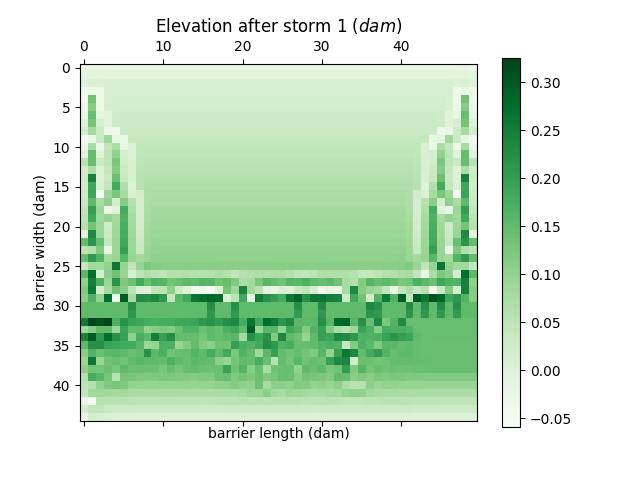

We get this weird pattern because sediment fluxes are too high, so I tried 0.001/depth instead which gave us not enough sed transport in the back barrier:

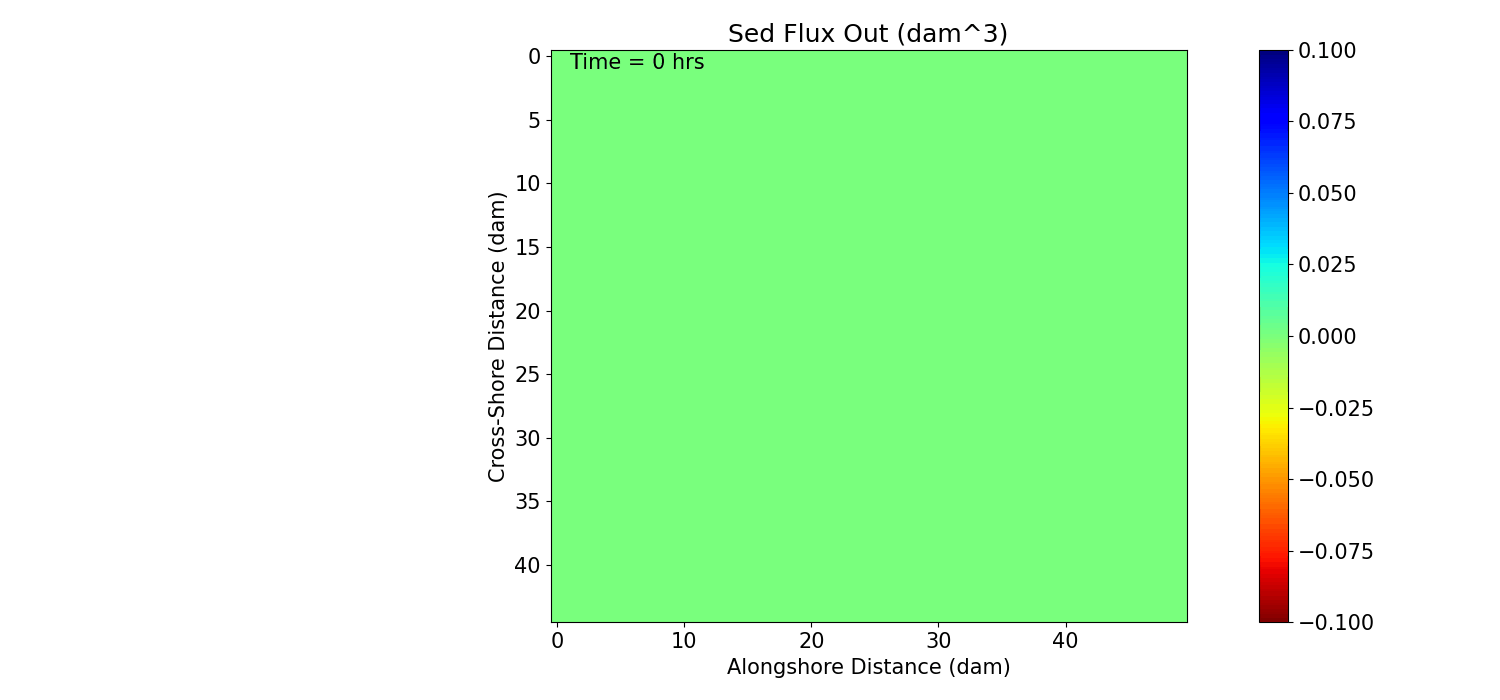

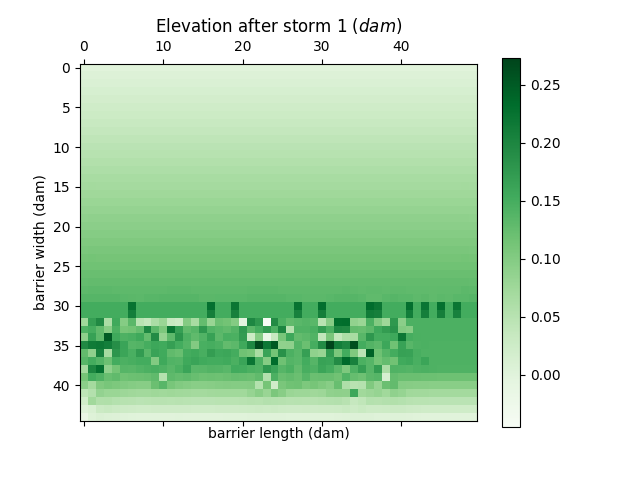

So then I tried 0.003, 0.005, and 0.008.

0.003:

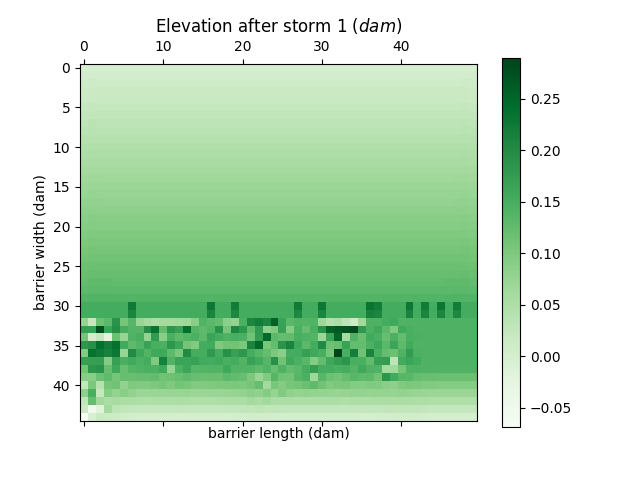

0.005:

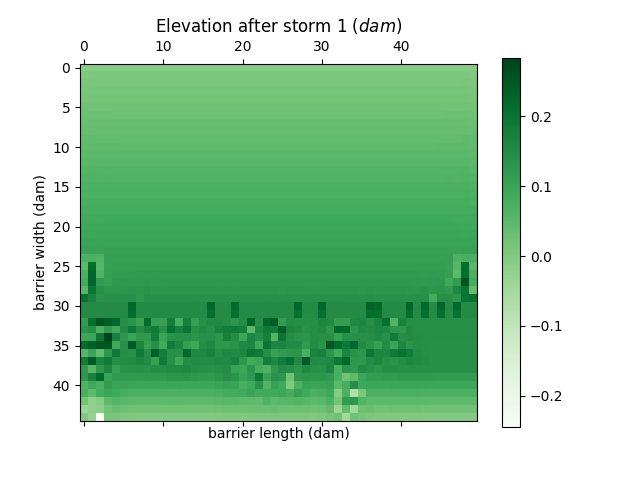

0.008:

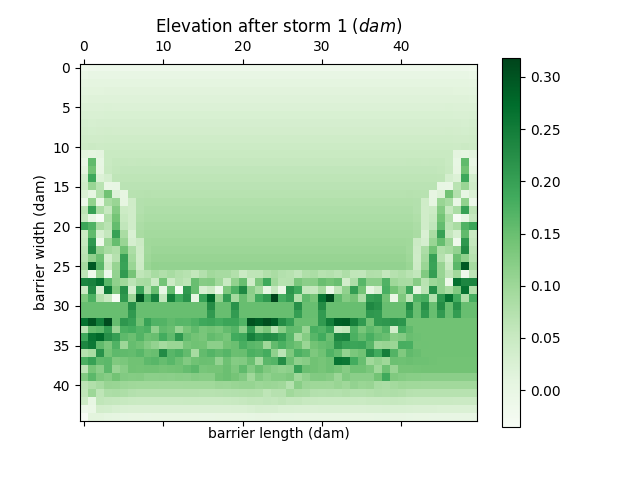

Even though 0.003 seems the same as 0.001, we do see differences in the sediment flux in the back barrier. 0.005 and 0.008 give too much flux and alter "physics."

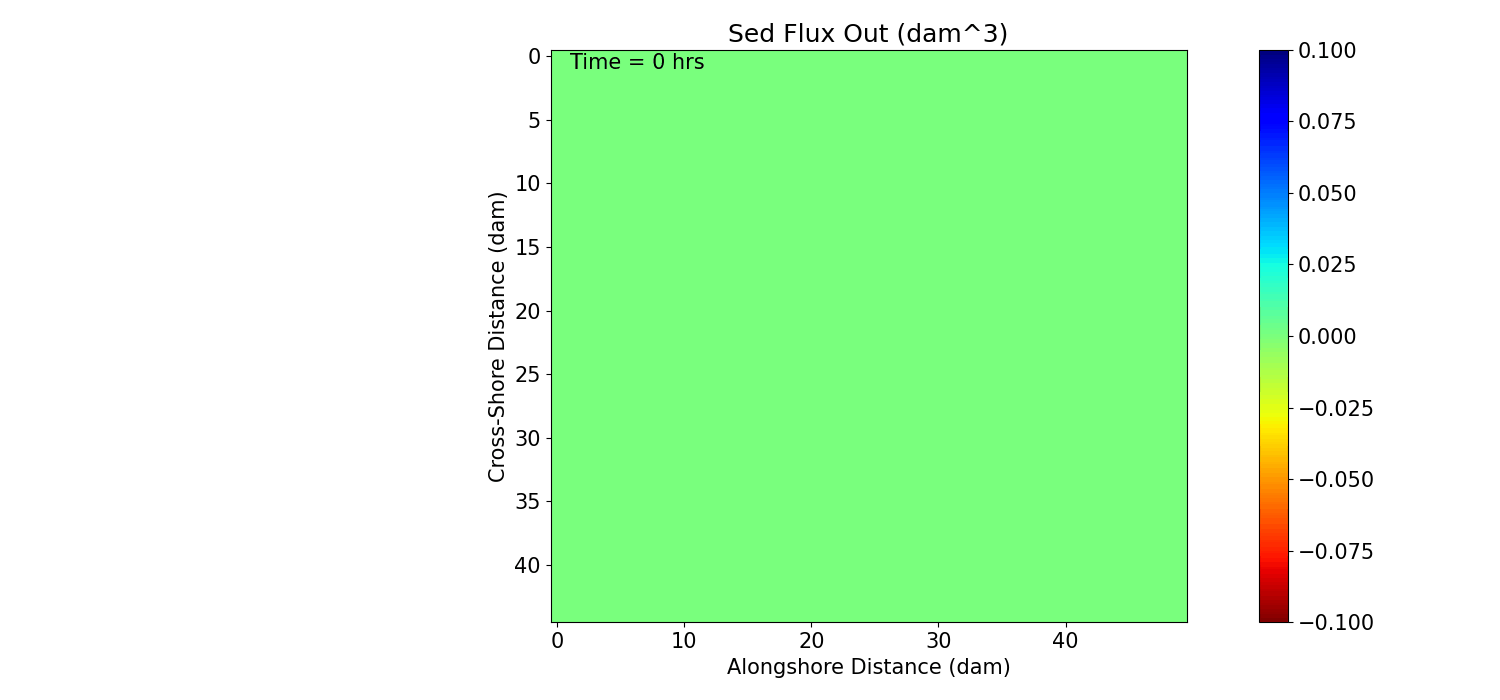

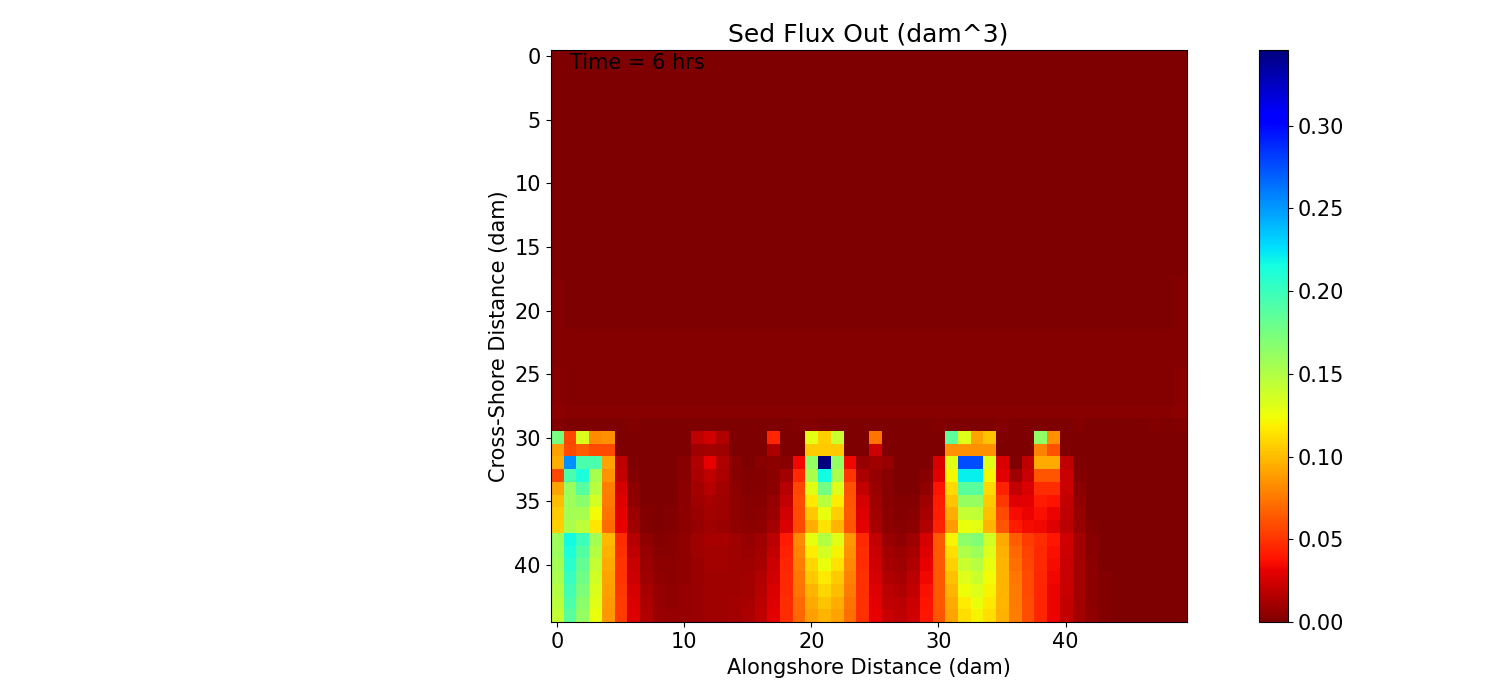

All of these used the new flow routing algorith through the dunes, but I also tried stopping it before the dunes and applying the "normal" relationship at the dunes. It gave slightly more sediment flux out of the system.

Dunes following regular flow routing:

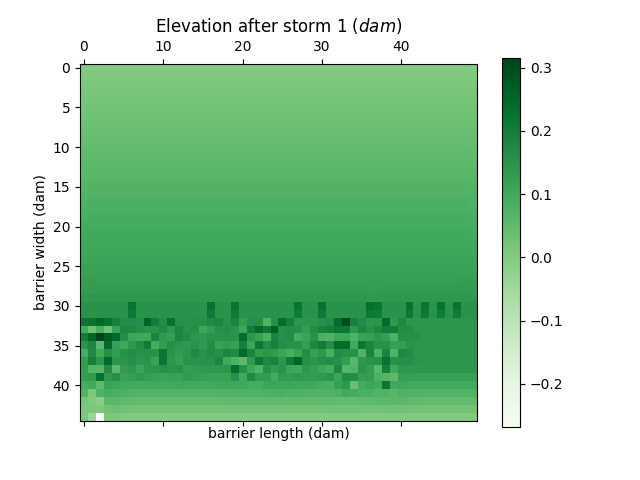

Dunes using back barrier flow routing:

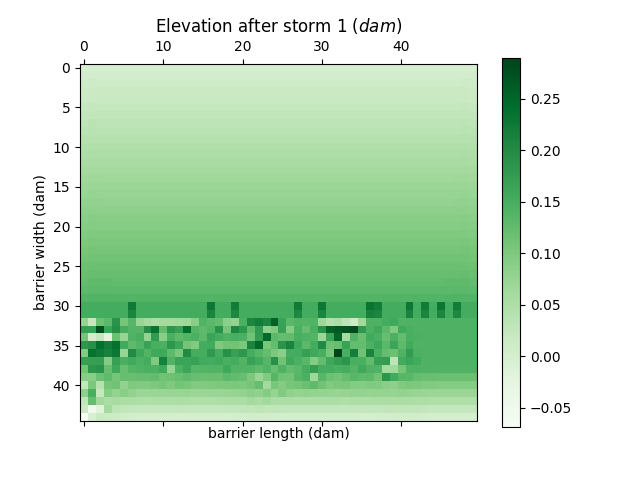

# Calling Outwasher

In [1]:
import numpy as np
import math
import os
import imageio
from barrier3d import Barrier3d
import matplotlib.pyplot as plt
import imageio
import csv

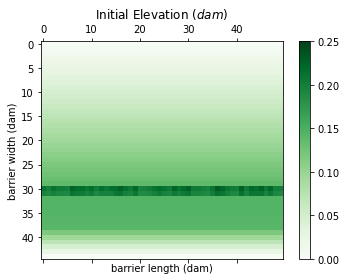

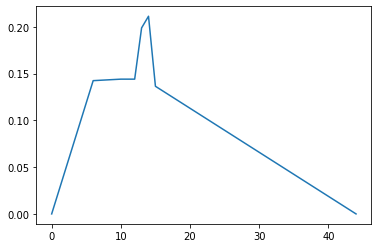

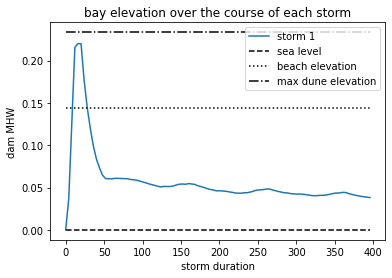

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

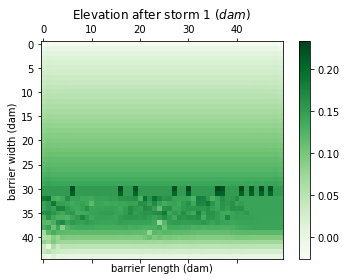

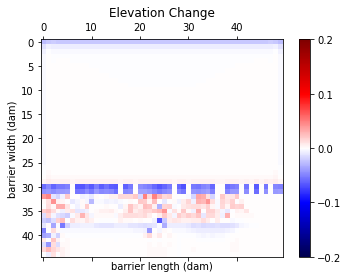

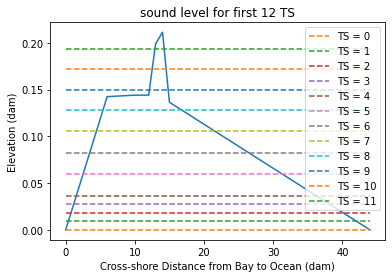

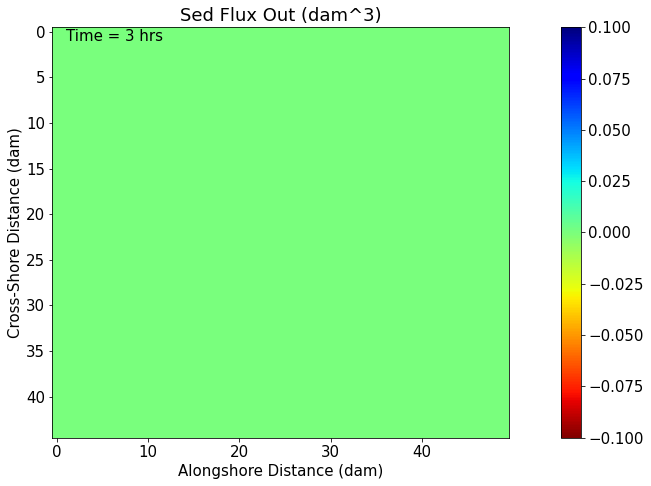

In [2]:
from cascade import outwasher_reorganized